# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane are more effective at reducing tumor volume compared to other drugs. This is indicated by their smaller mean tumor volumes relative to the other drugs in the study.

There is a positive correlation between the weight of mice and tumor size. This indicates that as the weight of the mouse increases, the size of the tumor also tends to increase. The correlation coefficient is 0.84, indicating a strong positive correlation.

The number of mice treated with Capomulin and Ramicane was higher than for the other drugs, with N=230 and N=228, respectively. The statistical methods used should take this into account to avoid bias in the selection and analysis of the final data. The gender distribution of the mice was balanced, with an almost equal number of males and females.

Capomulin and Ramicane are more effective at reducing tumor volume compared to the other drugs, as indicated by both the summary statistics table and box plot (fig1). The increased efficiency of Capomulin is further supported by the results of a randomly selected mouse from the dataset (g288), which showed a continued decline in tumor volume through the treatment period leading up to day 45 (fig2).
 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].unique()
len(num_mice)

249

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_data = merged_df.loc[(merged_df['Mouse ID'] == 'g989')]
duplicate_id_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = len(clean_df['Mouse ID'].unique())
num_mice_cleaned

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_stats_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats_2=  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

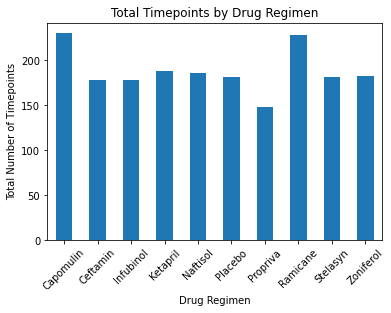

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_per_regimen = clean_df.groupby('Drug Regimen')['Timepoint'].count()
ax = timepoints_per_regimen.plot(kind='bar', rot=45, title='Total Timepoints by Drug Regimen', ylabel='Total Number of Timepoints')
plt.show()

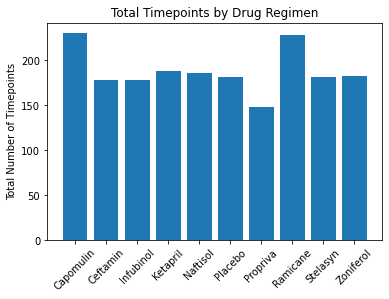

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regimen_labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
timepoints = [clean_df.loc[clean_df['Drug Regimen'] == r, 'Timepoint'].count() for r in regimen_labels]
plt.bar(regimen_labels, timepoints)
plt.xticks(rotation=45)
plt.title('Total Timepoints by Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.show()

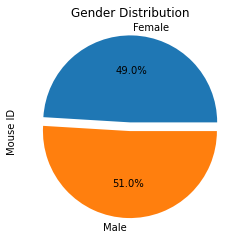

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = clean_df.groupby('Sex').count()['Mouse ID']
ax = gender_distribution.plot(kind='pie', title='Gender Distribution', autopct='%1.1f%%', explode=(0.1,0))
plt.show()

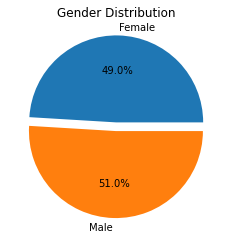

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_labels = ['Female', 'Male']
plt.pie(gender_distribution, labels=gender_labels, explode=(0.1,0), autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_volume = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
final_volume_df = pd.DataFrame(final_volume)
final_volume_df = pd.merge(clean_df, final_volume_df, on=('Mouse ID','Timepoint'), how='right')
final_volume_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [58]:
# Create empty list to fill with tumor vol data (for plotting)

capomulin_t = []
ramicane_t = []
infubinol_t = []
ceftamin_t = []


# Put treatments into a list for for loop (and later for plot labels)

for index, row in final_volume_df.iterrows():
        if row["Drug Regimen"] == treatments[0]:
            capomulin_t.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == treatments[1]:
            ramicane_t.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == treatments[2]:
            infubinol_t.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == treatments[3]:
            ceftamin_t.append(row['Tumor Volume (mm3)'])

drugs_df = pd.DataFrame({treatments[0]: capomulin_t,
                       treatments[1]: ramicane_t,
                       treatments[2]: infubinol_t,
                       treatments[3]: ceftamin_t
                       })



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor_vol = []

for drug in treatments:
    
    final_tumor_vol = clean_df.loc[clean_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    final_tumor_vol.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = round(quartiles[.25],2)
    upperq = round(quartiles[.75],2)
    mean = final_tumor_vol.mean()
    iqr = round(upperq-lowerq,2)  

    print(f"{drug} Regimen")
    print(f"The lower quartile of {drug} tumors is: {lowerq}")
    print(f"The upper quartile of {drug} tumors is: {upperq}")
    print(f"The interquartile range of {drug} tumors is: {iqr}")
    print('-'*60) 
    

Capomulin Regimen
The lower quartile of Capomulin tumors is: 37.69
The upper quartile of Capomulin tumors is: 45.0
The interquartile range of Capomulin tumors is: 7.31
------------------------------------------------------------
Ramicane Regimen
The lower quartile of Ramicane tumors is: 36.67
The upper quartile of Ramicane tumors is: 45.0
The interquartile range of Ramicane tumors is: 8.33
------------------------------------------------------------
Infubinol Regimen
The lower quartile of Infubinol tumors is: 47.31
The upper quartile of Infubinol tumors is: 57.31
The interquartile range of Infubinol tumors is: 10.0
------------------------------------------------------------
Ceftamin Regimen
The lower quartile of Ceftamin tumors is: 47.21
The upper quartile of Ceftamin tumors is: 56.8
The interquartile range of Ceftamin tumors is: 9.59
------------------------------------------------------------


C:\Users\FiercePC\AppData\Local\Temp\ipykernel_13244\4151780162.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_vol.append(final_tumor_vol)
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_13244\4151780162.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_vol.append(final_tumor_vol)
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_13244\4151780162.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_vol.append(final_tumor_vol)
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_13244\4151780162.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_vol.append(final_tumor_vol)


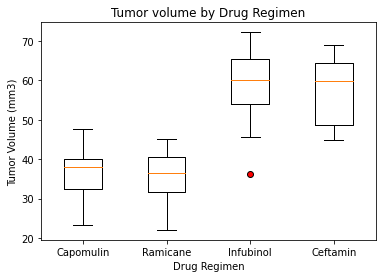

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot = [drugs_df[treatments[0]],
                drugs_df[treatments[1]],
                drugs_df[treatments[2]],
                drugs_df[treatments[3]]
               ]

fig, ax = plt.subplots()
ax.boxplot(boxplot, labels = treatments, flierprops = {"markerfacecolor": "red"})
ax.set_title('Tumor volume by Drug Regimen') 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Volume (mm3)') 
plt.show()


## Line and Scatter Plots

In [69]:
mouse_df = Capo_df.loc[Capo_df["Mouse ID"] == "g288",:]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
235,g288,Capomulin,Male,3,19,0,45.000000,0
236,g288,Capomulin,Male,3,19,5,45.839400,0
237,g288,Capomulin,Male,3,19,10,46.304003,1
238,g288,Capomulin,Male,3,19,15,42.172301,1
239,g288,Capomulin,Male,3,19,20,42.957120,1
240,g288,Capomulin,Male,3,19,25,42.368692,1
241,g288,Capomulin,Male,3,19,30,42.874461,1
242,g288,Capomulin,Male,3,19,35,38.954115,1
243,g288,Capomulin,Male,3,19,40,36.356851,1
244,g288,Capomulin,Male,3,19,45,37.074024,1


Text(0, 0.5, 'Tumor Volume (mm3)')

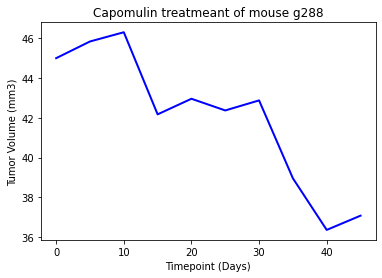

In [73]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = mouse_df["Timepoint"]
y_axis = mouse_df["Tumor Volume (mm3)"]

fig2, ax2 = plt.subplots()
plt.title("Capomulin treatmeant of mouse g288")
plt.plot(x_axis, y_axis,linewidth=2, color="blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

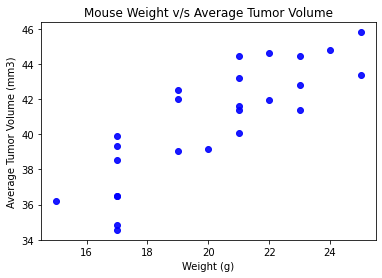

In [75]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capo_Rx_df =Capo_df.groupby(["Mouse ID"]).mean()
x_axis = Capo_Rx_df["Weight (g)"]
y_axis = Capo_Rx_df["Tumor Volume (mm3)"]
fig3 = plt.scatter(x_axis, y_axis, alpha=0.90, color="blue")
marker_size=15
plt.title('Mouse Weight v/s Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_axis = Capo_Rx_df["Weight (g)"]
y_axis = Capo_Rx_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.show()

The correlation between mouse weight and average tumor volume is 0.84


The r-squared is: 0.709


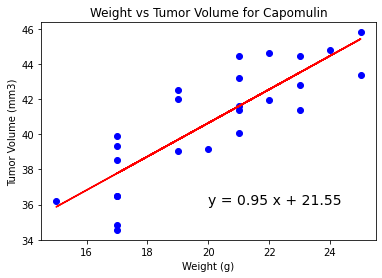

In [79]:
x_axis = Capo_Rx_df["Weight (g)"]
y_axis = Capo_Rx_df["Tumor Volume (mm3)"]

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis,y_axis)
regress_values= x_axis* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis,y_axis,color='b')
plt.plot(x_axis, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()